data cleaning

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/diamonds (newrs).csv'
diamonds_data = pd.read_csv(file_path)

# Display the first few rows and data summary
diamonds_data.head(), diamonds_data.info(), diamonds_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
 0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
 1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
 2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
 3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
 4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   
 
       z  
 0  2.43  
 1  2.31  
 2  2.31  
 3  2.63  
 4  2.75  ,
 None,
          Unnamed: 0         carat         depth         table         price  \
 count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
 mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
 std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
 min        1.000000      0.200000     43.000000     43.000000    326.000000   
 25%    13485.750000      0.400000    

In [ ]:
# Drop the 'Unnamed: 0' column as it is just an index
diamonds_data.drop('Unnamed: 0', axis=1, inplace=True)

# Check for any anomalies like zero dimensions (x, y, z)
zero_dimensions = diamonds_data[(diamonds_data['x'] <= 0) | (diamonds_data['y'] <= 0) | (diamonds_data['z'] <= 0)]
zero_dimensions


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Encoding

In [ ]:
# Remove entries with zero dimensions
diamonds_data = diamonds_data[(diamonds_data['x'] > 0) & (diamonds_data['y'] > 0) & (diamonds_data['z'] > 0)]

# One-hot encode the categorical variables
diamonds_encoded = pd.get_dummies(diamonds_data, columns=['cut', 'color', 'clarity'])

# Split the data into features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((43136, 26), (10784, 26))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error and the R^2 score for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(274693.7995699205, 0.9828658532042527)

Feature Extraction

In [ ]:
# Extract feature importances from the model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to view the feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
0,carat,0.566136
4,y,0.318349
21,clarity_SI2,0.019097
18,clarity_I1,0.015694
20,clarity_SI1,0.014320
17,color_J,0.010364
16,color_I,0.007719
23,clarity_VS2,0.007321
3,x,0.006492
15,color_H,0.005763


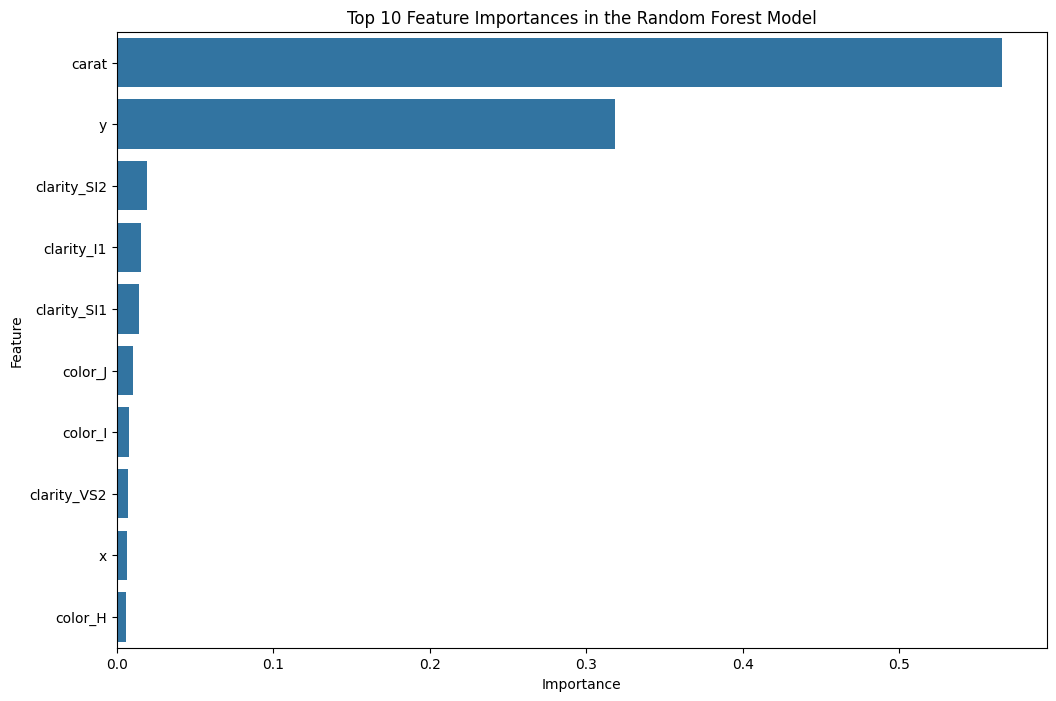

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Feature Importances in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


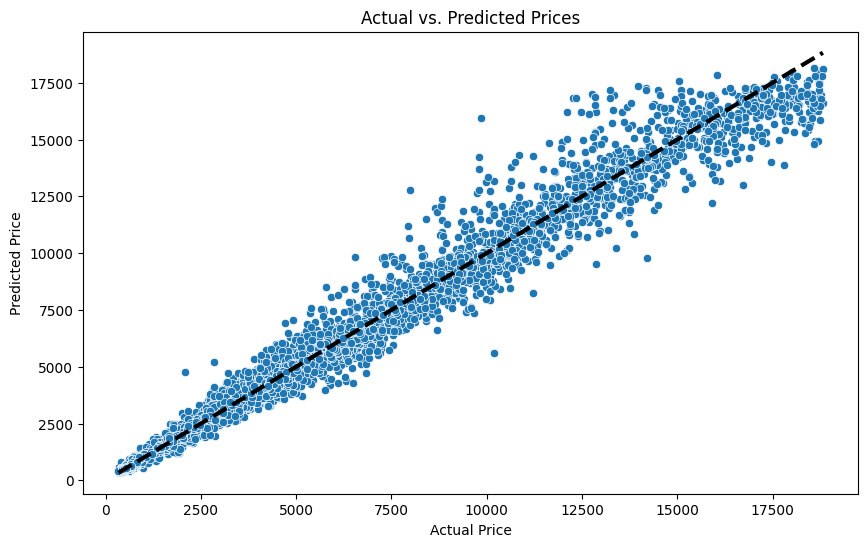

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Reference line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


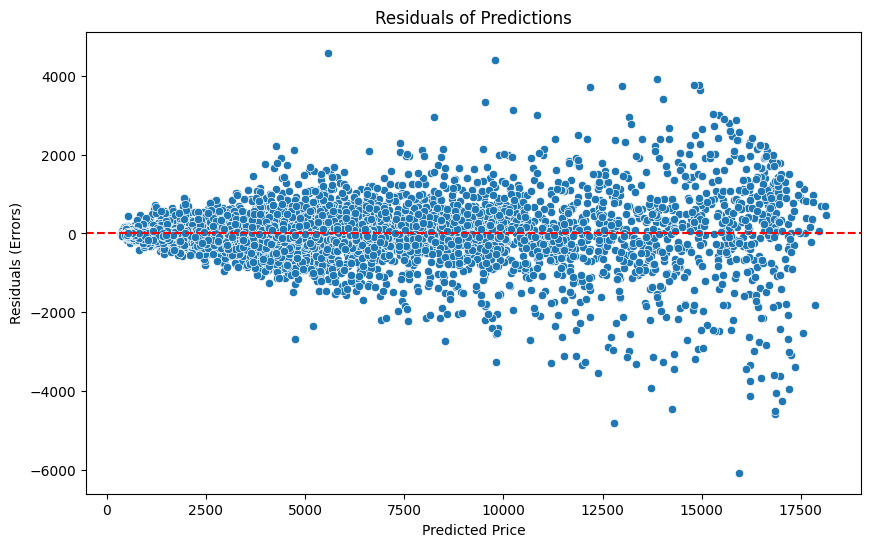

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Errors)')
plt.show()
